<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/new_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve

url = "https://raw.githubusercontent.com/Elwing-Chou/tibaml0315/main/train.csv"
urlretrieve(url, "/content/drive/MyDrive/data/new_titanic/train.csv")
url = "https://raw.githubusercontent.com/Elwing-Chou/tibaml0315/main/test.csv"
urlretrieve(url, "/content/drive/MyDrive/data/new_titanic/test.csv")

('/content/drive/MyDrive/data/new_titanic/test.csv',
 <http.client.HTTPMessage at 0x7f22948c53a0>)

In [2]:
import pandas as pd

traindf = pd.read_csv("/content/drive/MyDrive/data/new_titanic/train.csv", encoding="utf-8")
testdf = pd.read_csv("/content/drive/MyDrive/data/new_titanic/test.csv", encoding="utf-8")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
total = pd.concat([traindf, testdf], axis=0)
total = total.drop(["PassengerId", "Survived"], axis=1)
total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
def cabin(c):
    if pd.isna(c):
        return c
    else:
        return c[0]
total["Cabin"] = total["Cabin"].apply(cabin)

In [5]:
c = total["Ticket"].value_counts()
def ticket(t):
    if pd.isna(t):
        return t
    else:
        return c[t]

total["Ticket"] = total["Ticket"].apply(ticket)
total


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,1,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,3,108.9000,C,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,1,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,1,8.0500,NaN,S


In [6]:
import re
# 平常
# n = "Braund, Mr. Owen Harris"
# n.split(".5p 2u")[0].split(",")[-1]
def name(n):
    if pd.isna(n):
        return n
    else:
        pat = r".+,(.+?)\..+" # .匹配任意字元 +匹配任意數量 ?匹配0~1次 group(1)取出(匹配到內容) \. = .
        mid = re.match(pat, n).group(1)
        return mid.strip()
total["Name"] = total["Name"].apply(name)
total["Name"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Name, dtype: int64

In [7]:
def name_extract(nn):
    pat = r".+,(.+)\."
    mid = re.match(pat, nn).group(1)
    return mid
n_b = "Spector, Mr. Woolf"
print(name_extract(n_b))

 Mr


In [8]:
# pandas篩選: Series/DataFrame[跟妳資料一樣多的True/False]
s = total.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [9]:
'''缺失值

數值型(無限多種的): Age, Sibsp, Parch, Ticket, Fare

類別型(固定數種的): Pclass, Name, Sex, Cabin, Embarked

補缺失值: 捕最可能的

數值型: 中間值(中位數)

類別型: 最常出現的'''

med = total.median().drop("Pclass") # 處理欄位 為數字資料的 找出中位數
total = total.fillna(med) # 將med中有中位數的欄位 有空值用中位數取代
total

<ipython-input-9-7ab66b27cc7d>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = total.median().drop("Pclass") # 處理欄位 為數字資料的 找出中位數


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [10]:
most = total["Embarked"].value_counts().idxmax() # 處理欄位 為非數值資料 找出眾數
total["Embarked"] = total["Embarked"].fillna(most)
total

"""
所有類別型的資料還要再做最後一個處理: One-Hot Encoding

Pclass可以不做: 他是有大小關係的類別, 但我實驗過作比較好

Sex可以不做: 二值

一定要做:

a. 要確定資料處理好

b. 有時候太過稀少你可以為了表格的美觀而把它丟掉

c. 可以順手用one-hot來補缺失職
"""

'\n所有類別型的資料還要再做最後一個處理: One-Hot Encoding\n\nPclass可以不做: 他是有大小關係的類別, 但我實驗過作比較好\n\nSex可以不做: 二值\n\n一定要做:\n\na. 要確定資料處理好\n\nb. 有時候太過稀少你可以為了表格的美觀而把它丟掉\n\nc. 可以順手用one-hot來補缺失職\n'

In [11]:
test = pd.concat([total, traindf["Survived"]], axis=1)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S,0
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C,1
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S,1
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S,1
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S,0
414,1,Dona,female,39.0,0,0,3,108.9000,C,C,1
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S,0
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S,1


In [12]:
c = total["Name"].value_counts()
reserved = c[c > 10].index # [條件判定]
def name2(n):
    if n in reserved:
        return n
    else:
        return None
total["Name"] = total["Name"].apply(name2)

In [13]:
total = pd.get_dummies(total)
total = pd.get_dummies(total, columns=["Pclass"])
total
# 缺失
# One-Hot
# 萃取出更多欄位(回頭在做)

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [14]:
total["Family"] = total["SibSp"] + total["Parch"]
total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# https://ithelp.ithome.com.tw/articles/10240494
total_scale = scaler.fit_transform(total)
total_scale = pd.DataFrame(total_scale)
total_scale
     

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
import numpy as np
x = np.array(total_scale.iloc[:len(traindf)])
y = np.array(traindf["Survived"])
x_predict = np.array(total_scale.iloc[len(traindf):])
print(x.shape)
print(y.shape)
print(x_predict.shape)

(891, 26)
(891,)
(418, 26)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

greed = [0, 0]
for k in range(3, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    # 10分數
    scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1) # cv 幾等分 n_jobs 使用運算核心數 -1 現有核心全部使用
    a = float(scores.mean())
    b = np.average(scores)
    print(a, b ,type(b))
    if a > greed[0]:
        greed = [a, k]

print(greed)

0.8204993757802747 0.8204993757802747 <class 'numpy.float64'>
0.8081148564294631 0.8081148564294631 <class 'numpy.float64'>
0.8170786516853932 0.8170786516853932 <class 'numpy.float64'>
0.8227091136079899 0.8227091136079899 <class 'numpy.float64'>
0.832796504369538 0.832796504369538 <class 'numpy.float64'>
0.8136828963795256 0.8136828963795256 <class 'numpy.float64'>
0.8125842696629213 0.8125842696629213 <class 'numpy.float64'>
0.8058676654182271 0.8058676654182271 <class 'numpy.float64'>
0.818214731585518 0.818214731585518 <class 'numpy.float64'>
0.8069787765293384 0.8069787765293384 <class 'numpy.float64'>
0.8137203495630463 0.8137203495630463 <class 'numpy.float64'>
0.8125842696629213 0.8125842696629213 <class 'numpy.float64'>
0.8227215980024967 0.8227215980024967 <class 'numpy.float64'>
0.8137203495630463 0.8137203495630463 <class 'numpy.float64'>
0.8193508114856429 0.8193508114856429 <class 'numpy.float64'>
0.8137203495630461 0.8137203495630461 <class 'numpy.float64'>
0.8137203495

In [18]:
# 自己寫迴圈 --> GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    # 40種
    "n_estimators":range(21, 101, 2),
    # 9種
    "max_depth":range(6, 15)
}
clf = RandomForestClassifier()
# 會幫你是過360種組合->每一種都是做交叉驗證
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(6, 15),
                         'n_estimators': range(21, 101, 2)})

In [19]:
print(search.best_params_, search.best_score_)


{'max_depth': 6, 'n_estimators': 37} 0.8439950062421971


In [20]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x, y)
pre = clf.predict(x_predict)
pd.DataFrame({"PassengerId": testdf["PassengerId"],
        "Survived": pre
        }).to_csv("knn.csv", encoding="utf-8", index=False)


In [21]:
clf = RandomForestClassifier(max_depth=6, n_estimators=73)
clf.fit(x, y)
pre = clf.predict(x_predict)
pd.DataFrame({"PassengerId": testdf["PassengerId"],
        "Survived": pre
        }).to_csv("RF.csv", encoding="utf-8", index=False)

比較一下:

kNN是局部型演算法- 啟動資料不需要多

RF是全局型演算法- 如果你資料夠多, 一般來說會表現得比較好

其實我還是比較喜歡RF(可解釋性高)

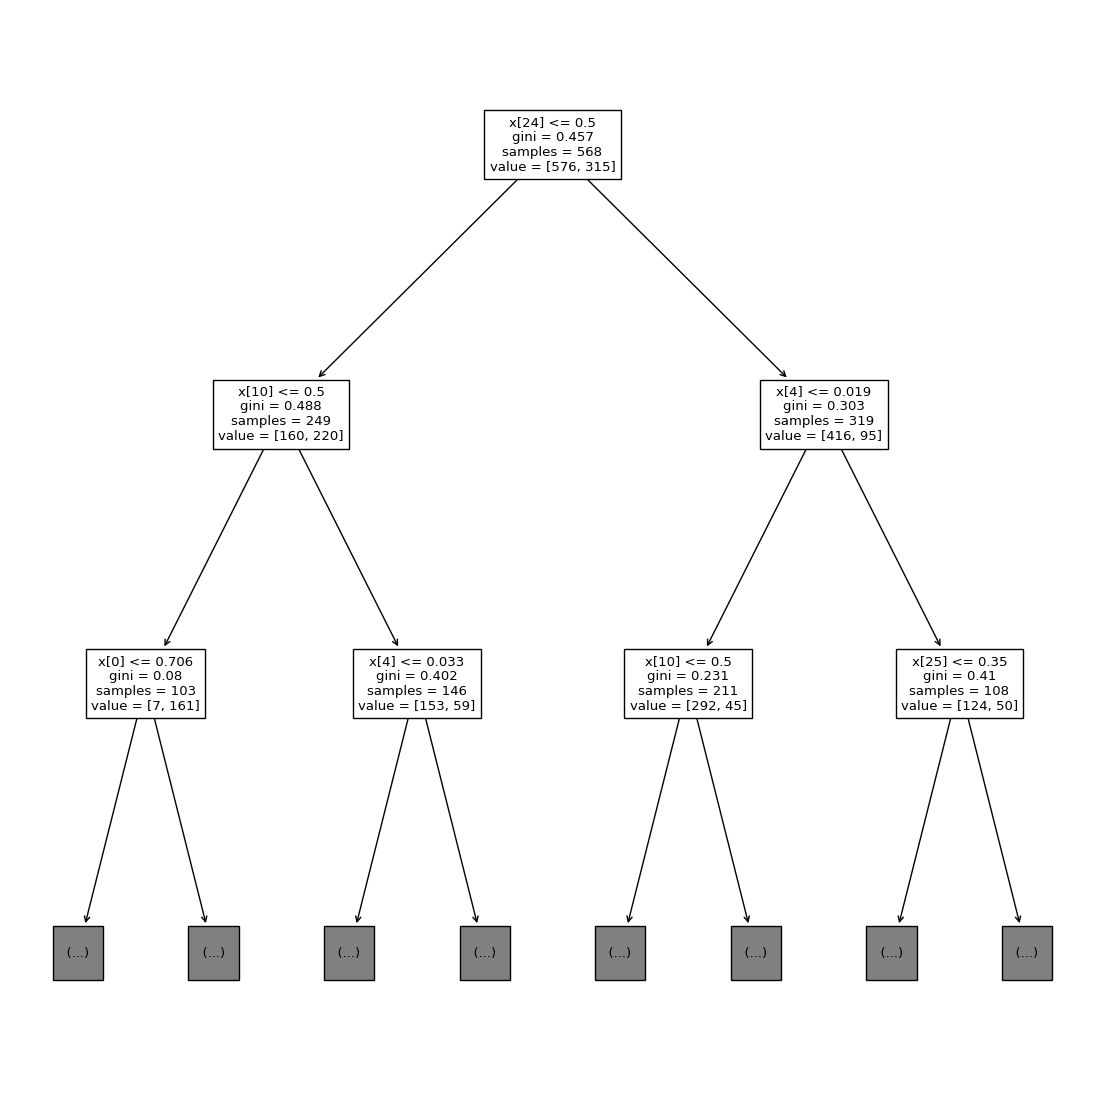

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 14))
plot_tree(clf.estimators_[0], max_depth=2)
plt.show()

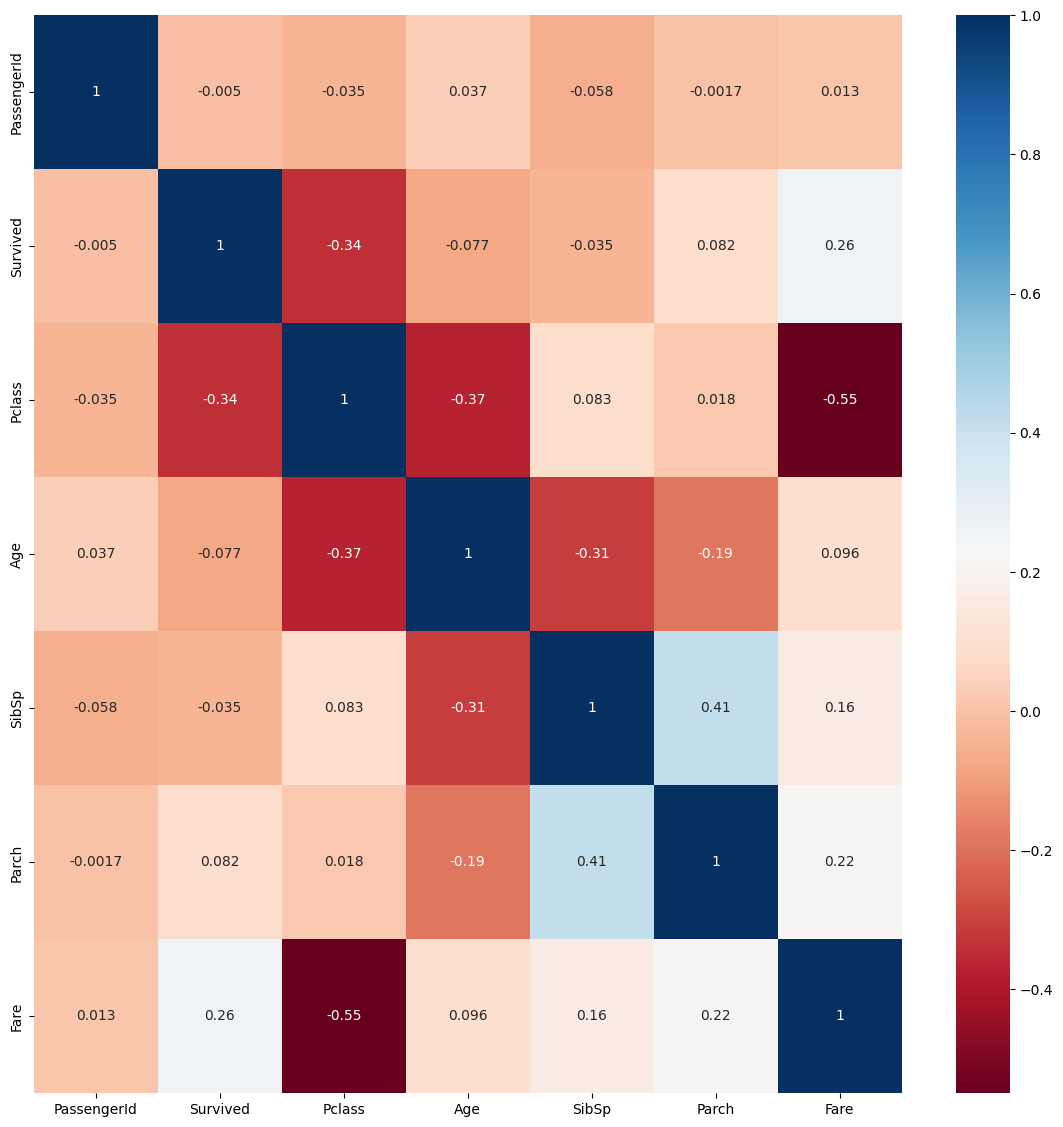

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(14, 14))
sns.heatmap(traindf.corr(), annot=True, cmap="RdBu")
plt.show()

title/axis(軸)/ticks(刻度)/legend(圖示)/label(x/y軸標籤)

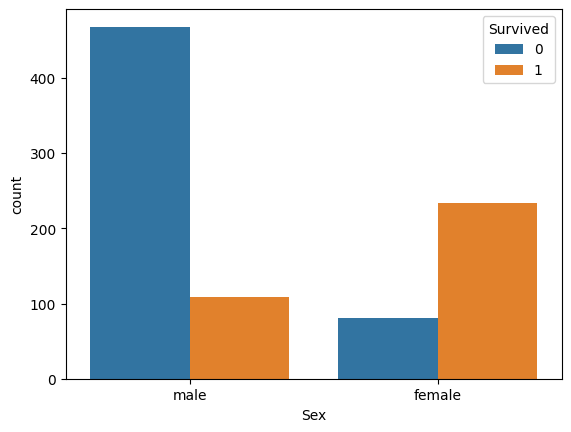

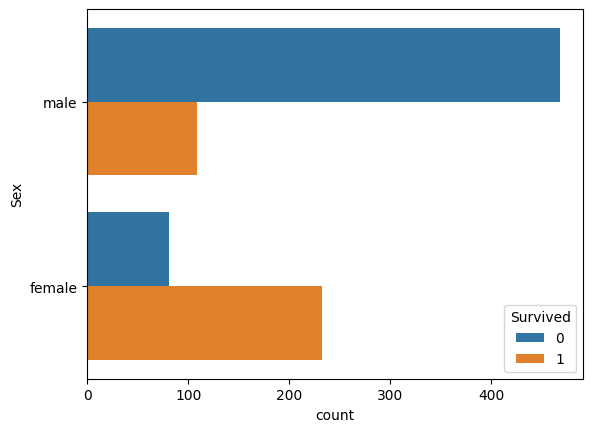

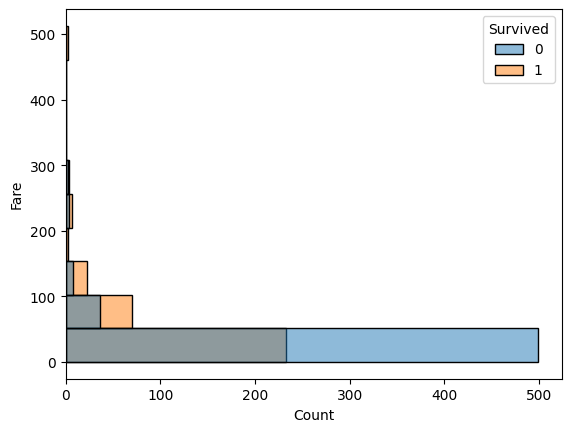

In [24]:
sns.countplot(data=traindf, x="Sex", hue="Survived")
plt.show()
sns.countplot(data=traindf, y="Sex", hue="Survived")
plt.show()
sns.histplot(data=traindf, y="Fare", hue="Survived", bins=10)
plt.show()

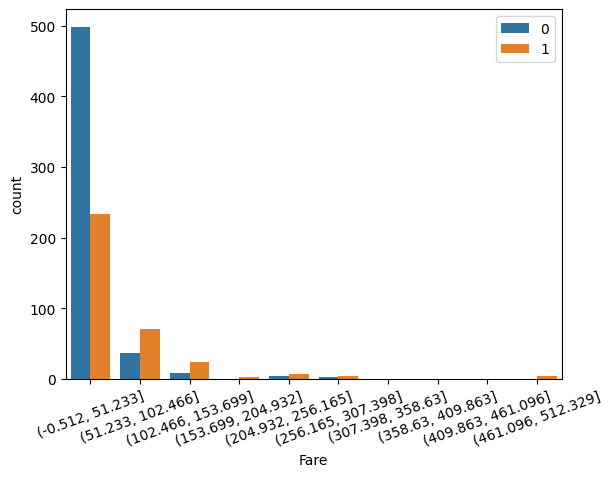

In [26]:
# -0.512 sklearn 自動在數據左右兩邊+ 10%的區間 當作觀察區間
# histogram: 對連續的東西分成數個區間, 屬數量
# sns.histplot(data=train, x="Fare", hue="Survived", bins=10)
c = pd.cut(traindf["Fare"], bins=10)
sns.countplot(x=c, hue=traindf["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

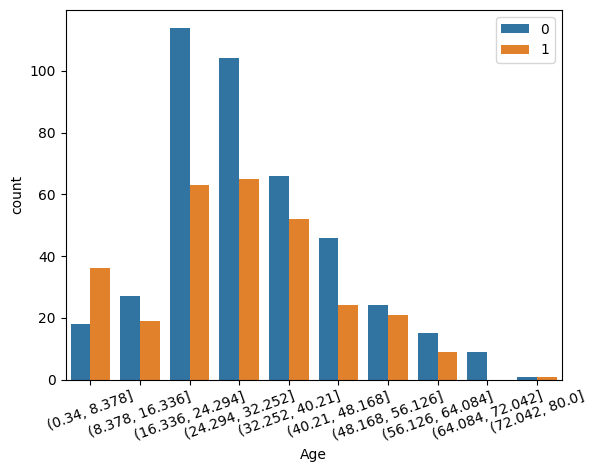

In [27]:
c = pd.cut(traindf["Age"], bins=10)
sns.countplot(x=c, hue=traindf["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

In [ ]:
# fit 跟 transform  也是在做這個事情

In [28]:
# 你可以用plot_tree去畫出來, 如果我有55科(0-54)
# clf.estimators_[54]
s = pd.Series(clf.feature_importances_, index=total.columns)
s.sort_values(ascending=False)

Sex_male       0.160625
Sex_female     0.152265
Name_Mr        0.148524
Fare           0.081883
Pclass_3       0.070647
Age            0.059968
Ticket         0.052730
Family         0.051791
Name_Mrs       0.043604
Pclass_1       0.028154
Name_Miss      0.026349
SibSp          0.022248
Name_Master    0.016109
Cabin_E        0.014008
Parch          0.013580
Pclass_2       0.013494
Embarked_C     0.012673
Embarked_S     0.007098
Cabin_D        0.006188
Cabin_C        0.005278
Cabin_B        0.004906
Embarked_Q     0.004589
Cabin_A        0.002084
Cabin_F        0.000656
Cabin_G        0.000514
Cabin_T        0.000035
dtype: float64

事前畫圖: 了解這題目好好做

把你所有的X劃在你的圖上, 如果你的東西聚成一群一群(簡單), 如果你的東西本就混砸(困難)

降維: 5個欄位 -> 2個欄位

SNE:

高維空間算出距離(normalize) -> 低維空間模仿距離(normalize)

擁擠效應: 間隔距離也縮小了, 所以你會覺得兩個東西相對來說沒分很開

tSNE:

低維空間我改用student-T做轉換 -> 近的更近, 遠得更遠

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

scaler = MinMaxScaler()
total_scale = scaler.fit_transform(total)
total_scale = pd.DataFrame(total_scale)
x_scale = np.array(total_scale.iloc[:len(traindf)])
y = np.array(traindf["Survived"])
# n_components:降低成幾維
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_scale)

<Axes: >

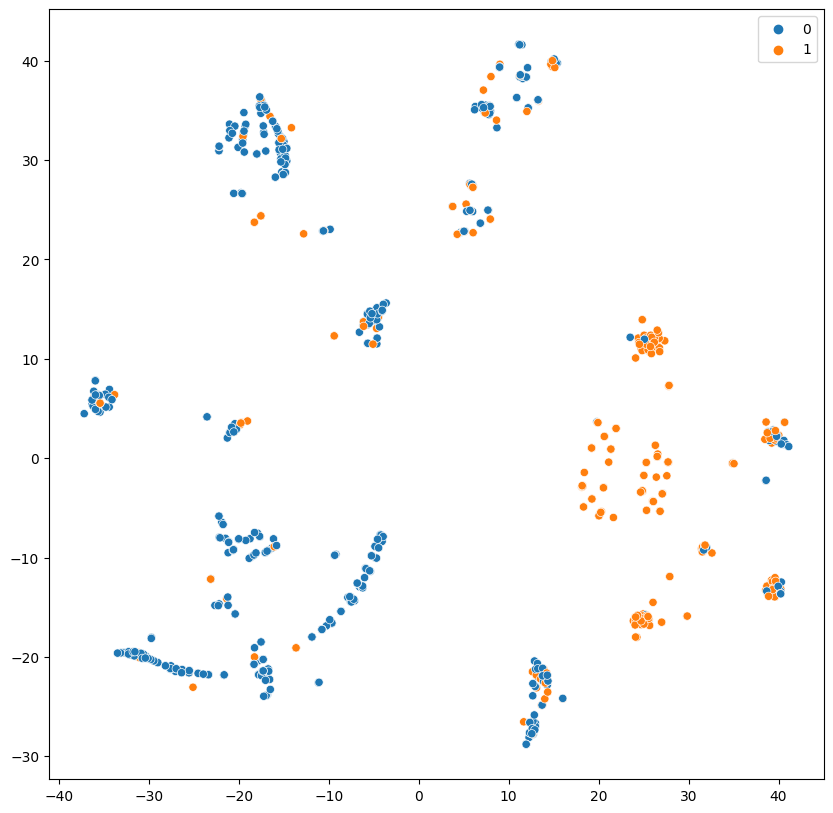

In [30]:
# np array操作: 對每一個軸各自做
plt.figure(figsize=(10, 10))
x_coords = x_tsne[:,0]
y_coords = x_tsne[:,1]
sns.scatterplot(x=x_coords, y=y_coords, hue=y)

In [ ]:
# 預處理(Missing/One-Hot/萃取) -> (tSNE評估一下這個問題是否困難) -> 建立模型 -> feature_impotance做出故事